In [18]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn. feature_extraction. text import TfidfTransformer
from sklearn. feature_extraction. text import TfidfVectorizer
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. metrics import confusion_matrix
from sklearn import metrics
from sklearn. metrics import roc_curve, auc
from nltk. stem. porter import PorterStemmer
import re
import string
from nltk. corpus import stopwords
from nltk. stem import PorterStemmer
from nltk. stem. wordnet import WordNetLemmatizer
from gensim. models import Word2Vec
from gensim. models import KeyedVectors
import pickle
import scipy as sp
from tqdm import tqdm
import os
from sklearn. cross_validation import train_test_split
from sklearn. neighbors import KNeighborsClassifier
from sklearn. metrics import accuracy_score
from sklearn. cross_validation import cross_val_score
from collections import Counter
from sklearn. metrics import accuracy_score
from sklearn import cross_validation
from sklearn. metrics import confusion_matrix
from sklearn. preprocessing import normalize
from sklearn import datasets, neighbors
from sklearn. metrics import roc_auc_score
from sklearn. preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn import tree
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

with open("C:/Python/Assignments/Preprocessing/final_sorted.txt", "rb") as file:
    sorted_data = pickle.load(file)

from wordcloud import WordCloud
# https://www.geeksforgeeks.org/generating-word-cloud-python/
def cloud(cluster,i):
    wordcloud = WordCloud(collocations=False, background_color ='white', 
                    min_font_size = 10).generate(str(list(cluster)))
    plt.figure(figsize = (6,6), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title("Cluster "+str(i),size= 30,)
    plt.show() 


<ol>
    <li><strong>Apply Agglomerative Clustering on these feature sets:</strong>
        <ul>
            <li><font color='red'>SET 3:</font>Review text, preprocessed one converted into vectors using (AVG W2v)</li>
            <li><font color='red'>SET 4:</font>Review text, preprocessed one converted into vectors using (TFIDF W2v)</li>
    <li>Apply agglomerative algorithm and try a different number of clusters like 2,5 etc.</li>
    <li>Same as that of K-means, plot word clouds for each cluster and summarize in your own words what that cluster is representing.</li>
            <li>You can take around 5000 reviews or so(as this is very computationally expensive one)</li>
        </ul>
    </li>
</ol>

### [5.2.1] Applying Agglomerative Clustering on AVG W2V,<font color='red'> SET 3</font>

In [19]:
data = sorted_data[:5000]
X = data['Text_new'].values
# Please write all the code with proper documentation
# List of sentence in X_train text
sent_x = []
for sent in X :
    sent_x.append(sent.split())
  
    
# Train your own Word2Vec model using your own train text corpus 
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(sent_x,min_count=5,size=50, workers=4)

w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))

# compute average word2vec for each review for sent_x .
train_vectors = []; 
for sent in tqdm(sent_x):
    sent_vec = np.zeros(50) 
    cnt_words =0; 
    for word in sent: # 
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_vectors.append(sent_vec)
    
data_3 = train_vectors    

number of words that occured minimum 5 times  5055


100%|█████████████████████████████████████| 5000/5000 [00:15<00:00, 321.69it/s]


Doing Agglomerative Clustering with  2  Clusters



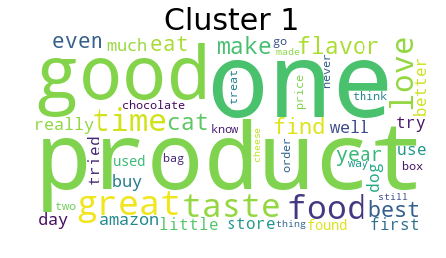

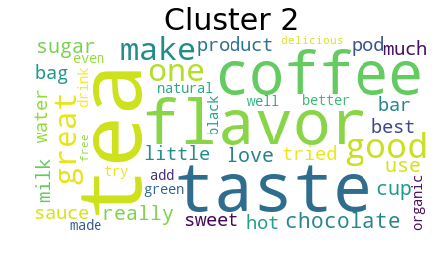

Doing Agglomerative Clustering with  3  Clusters



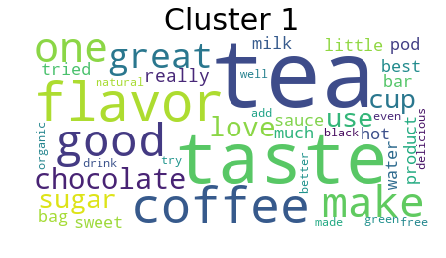

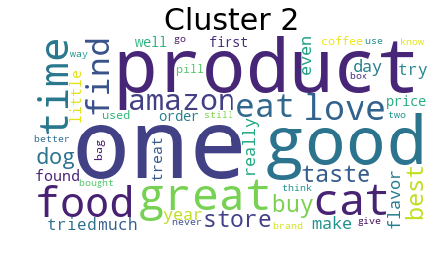

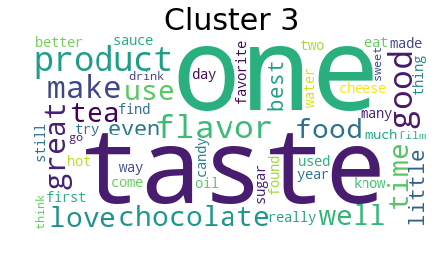

Doing Agglomerative Clustering with  5  Clusters



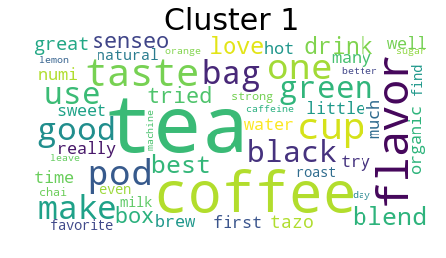

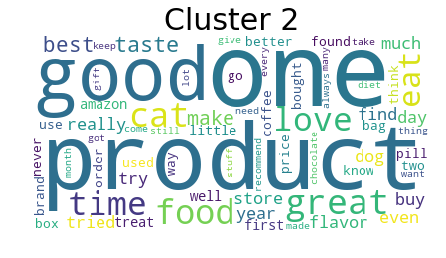

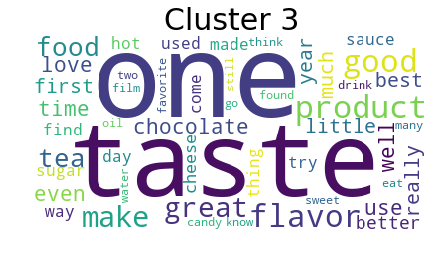

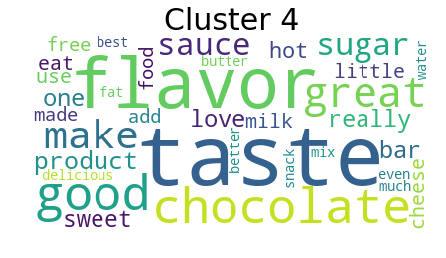

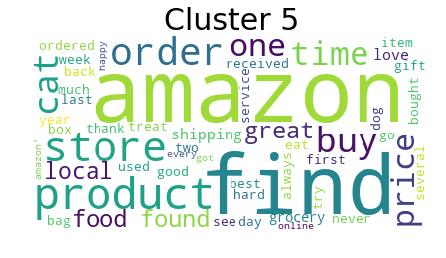

In [20]:
def agg(clust_n):
    print("Doing Agglomerative Clustering with ",clust_n," Clusters\n")
    agglo = AgglomerativeClustering(n_clusters=clust_n).fit(data_3)
    clust = [ [] for i in range(clust_n) ]  # this is the list of clusters
    for i in range(agglo.labels_.shape[0]):
        clust[agglo.labels_[i]].append(X[i])
    i = 1
    for cl in clust:
        cloud(cl,i)
        i += 1
agg(2)
agg(3)
agg(5)

**Observation:**

<font color='red'>**With 2 clusters:**</font>

The clusters are about,
1. This cluster is about product and amazon services related words.
2. This cluster is about tea, coffee, drinks related words.


<font color='red'>**With 3 clusters:**</font>

The clusters are about,
1. This cluster is about tea, coffee related words.
2. This cluster is about product, amazon related words.
3. This cluster is about chocolate, taste related words.


<font color='red'>**With 5 clusters:**</font>

The clusters are about,
1. This cluster is about tea, coffee, black coffee, flavour related words.
2. This cluster is about product, good food related words.
3. This cluster is about taste, chocolate related words.
4. This cluster is about sauce, sugar, taste, chocolate related words.
5. This cluster is about order, amazon, price related words.

### [5.2.3] Applying Agglomerative Clustering on TFIDF W2V,<font color='red'> SET 4</font>

In [21]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
model.fit(X)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))
# TF-IDF weighted Word2Vec
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(sent_x): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
data_4=tfidf_sent_vectors

100%|██████████████████████████████████████| 5000/5000 [01:38<00:00, 50.62it/s]


Doing Agglomerative Clustering with  2  Clusters



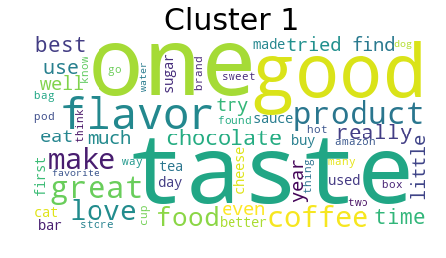

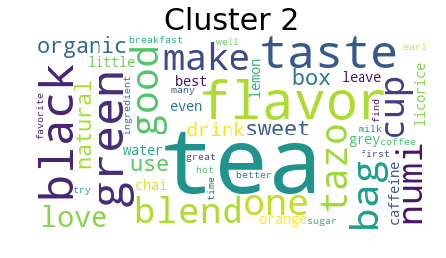

Doing Agglomerative Clustering with  3  Clusters



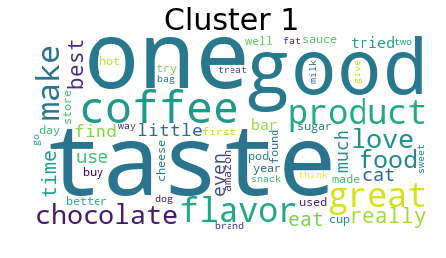

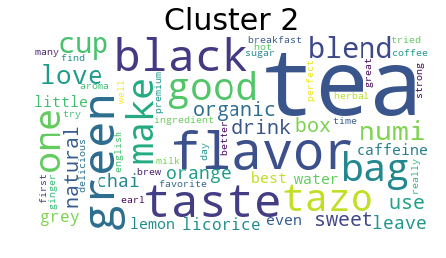

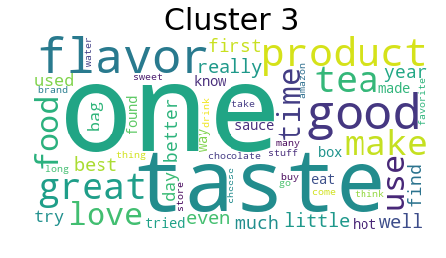

Doing Agglomerative Clustering with  5  Clusters



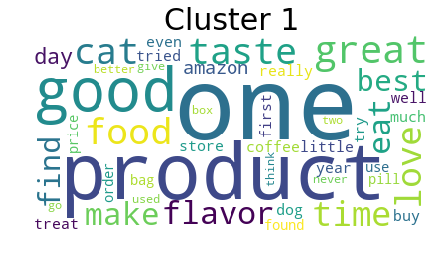

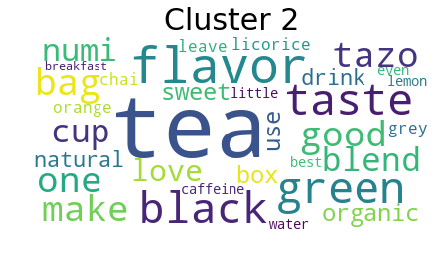

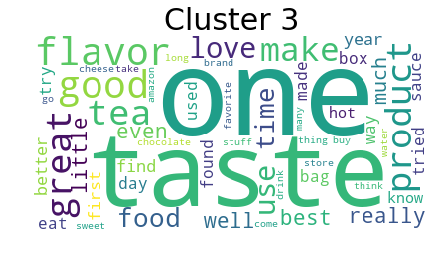

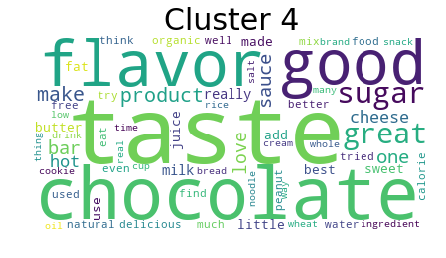

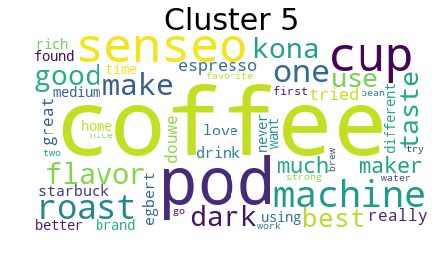

In [22]:
def agg(clust_n):
    print("Doing Agglomerative Clustering with ",clust_n," Clusters\n")
    agglo = AgglomerativeClustering(n_clusters=clust_n).fit(data_4)
    clust = [ [] for i in range(clust_n) ]  # this is the list of clusters
    for i in range(agglo.labels_.shape[0]):
        clust[agglo.labels_[i]].append(X[i])
    i = 1
    for cl in clust:
        cloud(cl,i)
        i += 1
agg(2)
agg(3)
agg(5)

**Observation:**

<font color='red'>**With 2 clusters:**</font>
  
The clusters are about,
1. This cluster is about taste, good product related words.
2. This cluster is about tea, coffee, drinks related words.


<font color='red'>**With 3 clusters:**</font>

The clusters are about,
1. This cluster is about chocolate, coffee related words.
2. This cluster is about tea, flavor, tea bag, green tea related words.
3. This cluster is about product, taste related words.

<font color='red'>**With 5 clusters:**</font>

The clusters are about,
1. This cluster is about product, taste related words.
2. This cluster is about tea, chai, tea bag related words.
3. This cluster is about taste, flavor related words.
4. This cluster is about flavor, taste, chocolate related words.
5. This cluster is about coffee, coffee machine, cup related words.